In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input,Dense,Flatten
from keras.models import Model

In [8]:
#데이터 가져오기
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle Boot']
class_names[train_labels[51]]

'Dress'

In [10]:
#이미지 전처리

train_images = train_images / 255.0 #0~250 에서 0~1로 nomalize
test_images = test_images / 255.0

In [12]:
#이미지 flatten
x_train = train_images.reshape(train_images.shape[0],-1) # (이미지 개수, 28x28 일렬로)
x_test = test_images.reshape(test_images.shape[0],-1)
#-1을 넣으면 나머지를 자동으로 계산해줌

In [17]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(2, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded) #출력값을 0~1 사이로 맞춰줌

autoencoder = Model(input_img, decoded)

In [18]:
autoencoder.compile(optimizer = 'adadelta', loss='binary_crossentropy')

In [19]:
autoencoder.fit(x_train,x_train, # 자기자신이 y값
               epochs=50,
               batch_size = 256,
               validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 26s 488us/step - loss: 0.5661 - val_loss: 0.4914
Epoch 2/50
54000/54000 [==============================] - 29s 540us/step - loss: 0.4811 - val_loss: 0.4771
Epoch 3/50
54000/54000 [==============================] - 25s 463us/step - loss: 0.4615 - val_loss: 0.4347
Epoch 4/50
54000/54000 [==============================] - 34s 634us/step - loss: 0.4140 - val_loss: 0.4091
Epoch 5/50
54000/54000 [==============================] - 43s 804us/step - loss: 0.3991 - val_loss: 0.3984
Epoch 6/50
54000/54000 [==============================] - 32s 585us/step - loss: 0.3889 - val_loss: 0.3882
Epoch 7/50
54000/54000 [==============================] - 28s 525us/step - loss: 0.3825 - val_loss: 0.3900
Epoch 8/50
54000/54000 [==============================] - 33s 619us/step - loss: 0.3785 - val_loss: 0.3824
Epoch 9/50
54000/54000 [==============================] - 38s 708us/step - loss: 0.3754 - val_l

In [23]:
x_test = test_images.reshape(test_images.shape[0],-1)
decoded_imgs = autoencoder.predict(x_train)

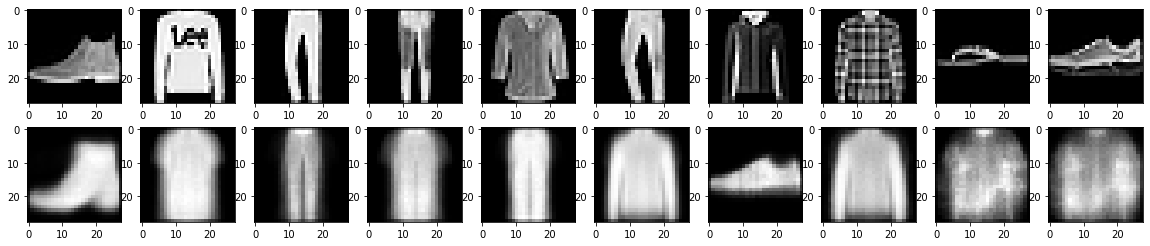

In [24]:
#reshape and visualization

plt.figure(figsize=(20,4))
for i in range(10):
    ax = plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    
    ax = plt.subplot(2,10,i+1+10)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    

In [25]:
#visualization of encoded data 

encoder = Model(input_img, encoded) #모델 중간에 encoded(dense 2) 를 추출
encoded_imgs = encoder.predict(x_test)

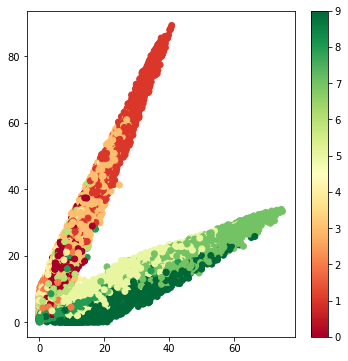

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=test_labels, cmap=plt.cm.RdYlGn)
plt.colorbar()